In [2]:
%cd .. 

c:\Users\josub\Desktop\BDMA\Brussels\Advanced Databases\PROJECT\SearchEngines_benchmark


C:\Users\josub\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
!pip install pymysql seaborn
import pymysql
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from src import queries_sphinx_1
from src import queries_sphinx_2
from src import queries_sphinx_3
import importlib

# Reload the specific module
importlib.reload(queries_sphinx_1)
importlib.reload(queries_sphinx_2)
importlib.reload(queries_sphinx_3)

# Access the updated query_dictionary
query_dictionary_1 = queries_sphinx_1.query_dictionary
query_dictionary_2 = queries_sphinx_2.query_dictionary
query_dictionary_3 = queries_sphinx_3.query_dictionary
print(query_dictionary_1)
print(query_dictionary_2)
print(query_dictionary_3)

{1: "\n            SELECT id, Score \n            FROM comments1 \n            WHERE MATCH('@text Python')\n            ORDER BY Score DESC\n            ", 2: "\n            SELECT id, Score\n            FROM posts1\n            WHERE MATCH('@title Python') AND ClosedDate!=0\n            ORDER BY Score DESC\n            ", 3: "\n            SELECT AccountId, Reputation, LastAccessDate \n            FROM users1\n            WHERE MATCH('@AboutMe Python SQL (Java | Javascript)')\n            ORDER BY Reputation DESC, LastAccessDate DESC\n", 4: "\n            SELECT id\n            FROM posts1\n            WHERE MATCH('@body Python | SQL') AND FavoriteCount>3\n            ", 5: "\n            SELECT id, CreationDate\n            FROM comments1 \n            WHERE MATCH('@text Python -SQL') AND CreationDate=2008\n            ", 6: "\n            SELECT id, DownVotes\n            FROM users1\n            WHERE MATCH('@AboutMe Python | SQL^2') and Downvotes=0\n            ORDER BY DownVotes 

Write the following command in the terminal (PowerShell): sphinx-3.7.1\bin\searchd --config sphinx-min.conf.dist

In [7]:
conn = pymysql.connect(host="127.0.0.1", port=9306)
cursor = conn.cursor()
# Initialize a list to hold query metrics
query_metrics = []
TIMES=51
# Run benchmarks
for i in range(len(query_dictionary_1)):
    query = query_dictionary_1[i+1]
    
    print(f"Executing: {i+1}")
    for j in range(TIMES):
        start_time = time.time()
        cursor.execute(query)
        results = cursor.fetchall()
        end_time = time.time()
    
        # Collect execution time
        execution_time = end_time - start_time
        
        # Get number of rows and columns
        columns = [column[0] for column in cursor.description]  # Get column names
        num_rows = len(results)
        num_columns = len(columns)
        
        # Append metrics to the list
        query_metrics.append({
            'query_id':i+1,
            'execution_time': execution_time*1000,
            'run': j+1,
            'scale': '1x'
            
        })

for i in range(len(query_dictionary_2)):
    query = query_dictionary_2[i+1]
    
    print(f"Executing: {i+1}")
    for j in range(TIMES):
        start_time = time.time()
        cursor.execute(query)
        results = cursor.fetchall()
        end_time = time.time()
    
        # Collect execution time
        execution_time = end_time - start_time
        
        # Get number of rows and columns
        columns = [column[0] for column in cursor.description]  # Get column names
        num_rows = len(results)
        num_columns = len(columns)
        
        # Append metrics to the list
        query_metrics.append({
            'query_id':i+1,
            'execution_time': execution_time*1000,
            'run': j+1,
            'scale': '0.5x'
            
        })
        
for i in range(len(query_dictionary_3)):
    query = query_dictionary_3[i+1]
    
    print(f"Executing: {i+1}")
    for j in range(TIMES):
        start_time = time.time()
        cursor.execute(query)
        results = cursor.fetchall()
        end_time = time.time()
    
        # Collect execution time
        execution_time = end_time - start_time
        
        # Get number of rows and columns
        columns = [column[0] for column in cursor.description]  # Get column names
        num_rows = len(results)
        num_columns = len(columns)
        
        # Append metrics to the list
        query_metrics.append({
            'query_id':i+1,
            'execution_time': execution_time*1000,
            'run': j+1,
            'scale': '0.3x'
            
        })
# Convert to pandas DataFrame

df = pd.DataFrame(query_metrics)
df.to_csv('sphinxresults.csv', index=False)


Executing: 1
Executing: 2
Executing: 3
Executing: 4
Executing: 5
Executing: 6
Executing: 7
Executing: 8
Executing: 9
Executing: 10
Executing: 11
Executing: 12
Executing: 13
Executing: 14
Executing: 15
Executing: 16
Executing: 17
Executing: 18
Executing: 1
Executing: 2
Executing: 3
Executing: 4
Executing: 5
Executing: 6
Executing: 7
Executing: 8
Executing: 9
Executing: 10
Executing: 11
Executing: 12
Executing: 13
Executing: 14
Executing: 1
Executing: 2
Executing: 3
Executing: 4
Executing: 5
Executing: 6
Executing: 7
Executing: 8
Executing: 9
Executing: 10
Executing: 11
Executing: 12
Executing: 13
Executing: 14


In [28]:
# drop the first run to avoid cache problem
df_results = df[df['run']!=1] 
df_avg = df_results.groupby('query_id').agg({'execution_time':'mean'}).reset_index()

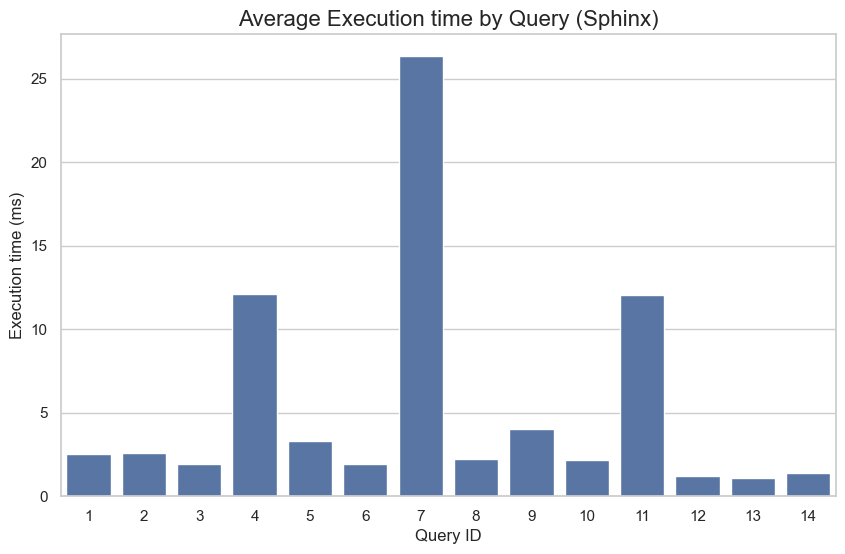

In [29]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.set(style="whitegrid")  # Set the style for the plot
sns.barplot(data=df_avg, x='query_id', y='execution_time')
# Add title and labels
plt.title("Average Execution time by Query (Sphinx)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
# Show the plot
plt.show()

C:\Users\josub\AppData\Local\Temp\ipykernel_19920\3275301398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['query_id'] = df_results['query_id'].astype(str)


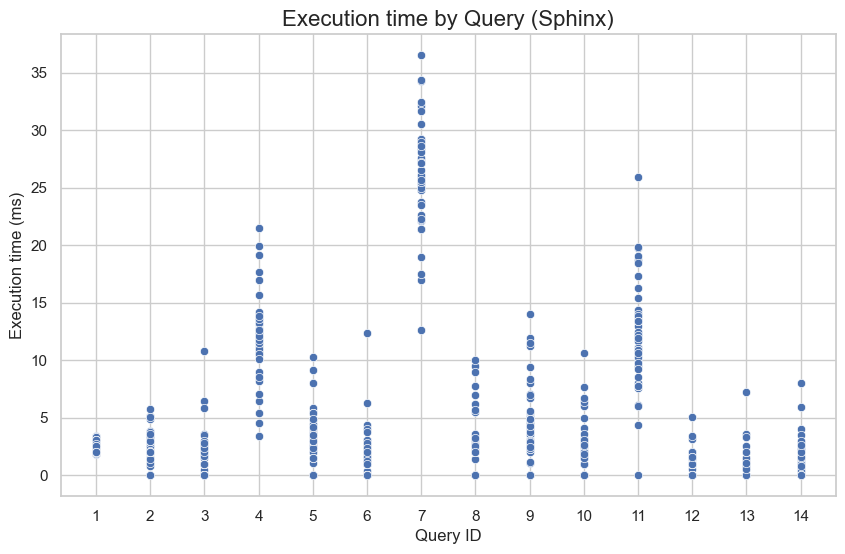

In [31]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.set(style="whitegrid")  # Set the style for the plot
df_results['query_id'] = df_results['query_id'].astype(str)
sns.scatterplot(data=df_results, x='query_id', y='execution_time')
# Add title and labels
plt.title("Execution time by Query (Sphinx)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
# Show the plot
plt.show()

C:\Users\josub\AppData\Local\Temp\ipykernel_19920\334519984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['query_id'] = df_results['query_id'].astype(str)


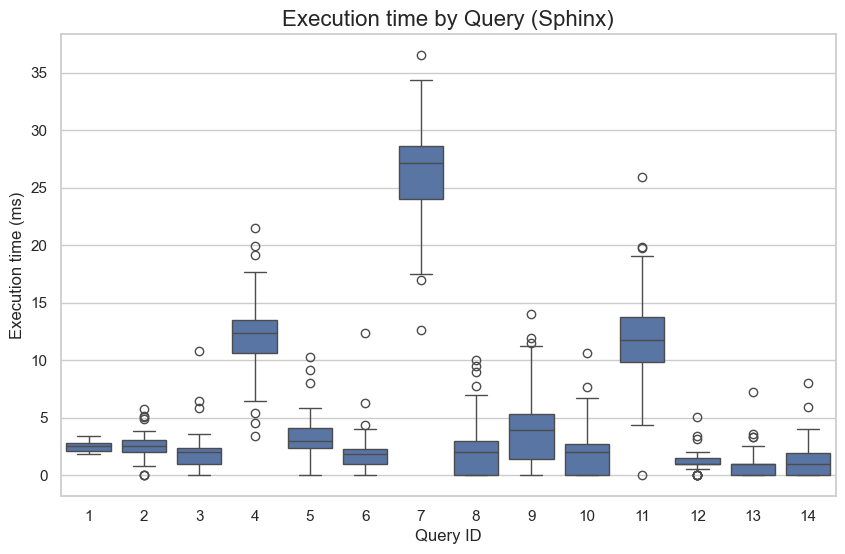

In [32]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.set(style="whitegrid")  # Set the style for the plot
df_results['query_id'] = df_results['query_id'].astype(str)
sns.boxplot(data=df_results, x='query_id', y='execution_time')
# Add title and labels
plt.title("Execution time by Query (Sphinx)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
# Show the plot
plt.show()